## DEEP LEARNING Tensorflow Neural Networks with Keras for classify

In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(1)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets

## firstly we use Neural Network without deep learning to be compared with deep learning later

In [3]:
# Create Data
X, y = sklearn.datasets.make_circles(noise=0.05, factor=.2, random_state=1)

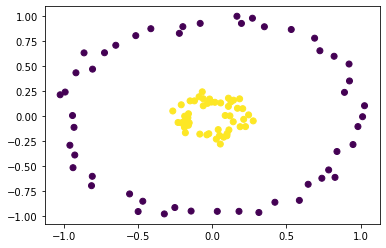

In [4]:
# Visualize Data
plt.scatter(X[:, 0], X[:, 1], c=y)

In [5]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [11]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
3/3 - 0s - loss: 0.8458 - accuracy: 0.4933
Epoch 2/100
3/3 - 0s - loss: 0.8402 - accuracy: 0.4933
Epoch 3/100
3/3 - 0s - loss: 0.8341 - accuracy: 0.4667
Epoch 4/100
3/3 - 0s - loss: 0.8292 - accuracy: 0.4267
Epoch 5/100
3/3 - 0s - loss: 0.8238 - accuracy: 0.4400
Epoch 6/100
3/3 - 0s - loss: 0.8187 - accuracy: 0.4133
Epoch 7/100
3/3 - 0s - loss: 0.8134 - accuracy: 0.4000
Epoch 8/100
3/3 - 0s - loss: 0.8096 - accuracy: 0.4267
Epoch 9/100
3/3 - 0s - loss: 0.8043 - accuracy: 0.3733
Epoch 10/100
3/3 - 0s - loss: 0.8003 - accuracy: 0.3333
Epoch 11/100
3/3 - 0s - loss: 0.7960 - accuracy: 0.2667
Epoch 12/100
3/3 - 0s - loss: 0.7913 - accuracy: 0.2800
Epoch 13/100
3/3 - 0s - loss: 0.7877 - accuracy: 0.2667
Epoch 14/100
3/3 - 0s - loss: 0.7836 - accuracy: 0.2667
Epoch 15/100
3/3 - 0s - loss: 0.7792 - accuracy: 0.2800
Epoch 16/100
3/3 - 0s - loss: 0.7759 - accuracy: 0.2800
Epoch 17/100
3/3 - 0s - loss: 0.7715 - accuracy: 0.2800
Epoch 18/100
3/3 - 0s - loss: 0.7681 - accuracy: 0.2800
E

## With deep learning by simply add an additional hidden layer of 6 nodes

In [15]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [16]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 14        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [17]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
3/3 - 0s - loss: 0.7093 - accuracy: 0.5333
Epoch 2/100
3/3 - 0s - loss: 0.7059 - accuracy: 0.5333
Epoch 3/100
3/3 - 0s - loss: 0.7031 - accuracy: 0.5067
Epoch 4/100
3/3 - 0s - loss: 0.6999 - accuracy: 0.4667
Epoch 5/100
3/3 - 0s - loss: 0.6972 - accuracy: 0.4400
Epoch 6/100
3/3 - 0s - loss: 0.6944 - accuracy: 0.4267
Epoch 7/100
3/3 - 0s - loss: 0.6914 - accuracy: 0.3867
Epoch 8/100
3/3 - 0s - loss: 0.6892 - accuracy: 0.3867
Epoch 9/100
3/3 - 0s - loss: 0.6867 - accuracy: 0.3600
Epoch 10/100
3/3 - 0s - loss: 0.6847 - accuracy: 0.3600
Epoch 11/100
3/3 - 0s - loss: 0.6823 - accuracy: 0.3467
Epoch 12/100
3/3 - 0s - loss: 0.6800 - accuracy: 0.3733
Epoch 13/100
3/3 - 0s - loss: 0.6780 - accuracy: 0.3867
Epoch 14/100
3/3 - 0s - loss: 0.6759 - accuracy: 0.4000
Epoch 15/100
3/3 - 0s - loss: 0.6736 - accuracy: 0.4133
Epoch 16/100
3/3 - 0s - loss: 0.6718 - accuracy: 0.4400
Epoch 17/100
3/3 - 0s - loss: 0.6696 - accuracy: 0.4400
Epoch 18/100
3/3 - 0s - loss: 0.6678 - accuracy: 0.4533
E

## Compare the models below, deep_model with much higher accuracy

In [18]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.6035 - accuracy: 0.6400
Normal Neural Network - Loss: 0.6035451889038086, Accuracy: 0.6399999856948853


In [19]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: 0.5345 - accuracy: 0.8800
Deep Neural Network - Loss: 0.5345200896263123, Accuracy: 0.8799999952316284


## notice cann't pickle and save Tensorflow model as deep_model